In [1]:
import get_dataframe
import pandas as pd
import matplotlib.pyplot as plt
cache_path = "../../data/sensor_cache/"

Data is pulled down using the sensor ID and a path to where the csv files are to be stored

In [2]:
id = 930429
get_dataframe.build_df(id, cache_path)

All items returned


csv files can be opened and loaded into a dataframe using the get_df() function

In [3]:
feeds = get_dataframe.get_df(id, cache_path)

In [4]:
feeds.head()
feeds.tail()

,entry_id,Sensor1 PM2.5_CF_1_ug/m3,Sensor1 PM10_CF_1_ug/m3,Sensor2PM2.5_CF_1_ug/m3,Sensor2 PM10_CF_1_ug/m3,Latitude,Longitude,Battery Voltage,GpsData
created_at,,,,,,,,,
2020-03-18T08:43:39Z,4804,27.62,32.07,27.18,30.88,0.0,0.0,3.75,"0.000000,0.000000,00000000.00,1109367000000000..."
2020-03-18T08:44:49Z,4805,14.23,16.50,14.62,15.52,0.0,0.0,3.75,"0.000000,0.000000,00000000.00,1109367000000000..."
2020-03-18T08:46:06Z,4806,12.68,13.85,13.27,14.33,0.0,0.0,3.75,"0.000000,0.000000,00000000.00,1109367000000000..."
2020-03-18T08:47:31Z,4807,27.98,31.27,30.53,36.13,0.0,0.0,3.75,"0.000000,0.000000,00000000.00,1109367000000000..."
2020-03-18T08:48:54Z,4808,28.02,31.20,27.62,32.88,0.0,0.0,3.75,"0.000000,0.000000,00000000.00,1109367000000000..."


Pollution data can be reshaped from the dataframe to aid analysis

In [5]:
pm_data = get_dataframe.get_pollution(id, feeds)

In [6]:
pm_data.head()
pm_data.tail()

PM10  PM2.5
sensor_id created_at                sensortype              
675801    2019-01-12 15:38:47+00:00 Sensor1     31.80  28.95
                                    Sensor2     26.75  25.67
          2019-01-12 15:44:40+00:00 Sensor1     27.37  24.90
                                    Sensor2     24.05  22.92
          2019-01-12 15:49:56+00:00 Sensor1     27.45  25.63

PM10  PM2.5
sensor_id created_at                sensortype              
675801    2020-03-06 13:44:37+00:00 Sensor2     36.58  29.45
          2020-03-06 13:45:59+00:00 Sensor1     50.08  32.08
                                    Sensor2     47.03  32.93
          2020-03-06 13:47:28+00:00 Sensor1     52.60  36.20
                                    Sensor2     49.85  37.40

We can drop the PM10 column and get an hourly average for the data set

In [7]:
sensor_hourly = pm_data.drop("PM10", axis=1)
sensor_hourly = sensor_hourly.groupby("sensortype")["PM2.5"].resample("H", level=1).mean()

We can then plot with just references to the required sensor

C:\Users\ac1dmrx\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


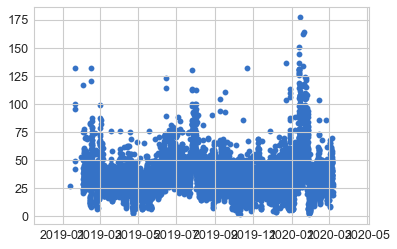

In [8]:
plt.scatter(sensor_hourly["Sensor1"].index, sensor_hourly["Sensor1"])


As the time field is in datetime format, pandas can index it with given dates. For example to get all results for Dec 2019

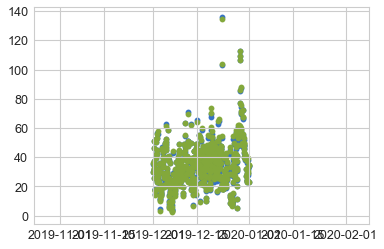

In [9]:
plt.scatter(sensor_hourly["Sensor1"]["2019-12"].index, 
            sensor_hourly["Sensor1"]["2019-12"])
plt.scatter(sensor_hourly["Sensor2"]["2019-12"].index, 
            sensor_hourly["Sensor2"]["2019-12"])

We can check the variability of the sensors against each other

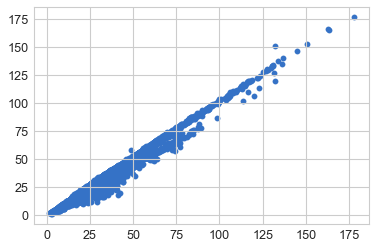

In [10]:
plt.scatter(sensor_hourly["Sensor1"], 
            sensor_hourly["Sensor2"])

<Figure size 1440x720 with 0 Axes>

(0.8, 1.4)

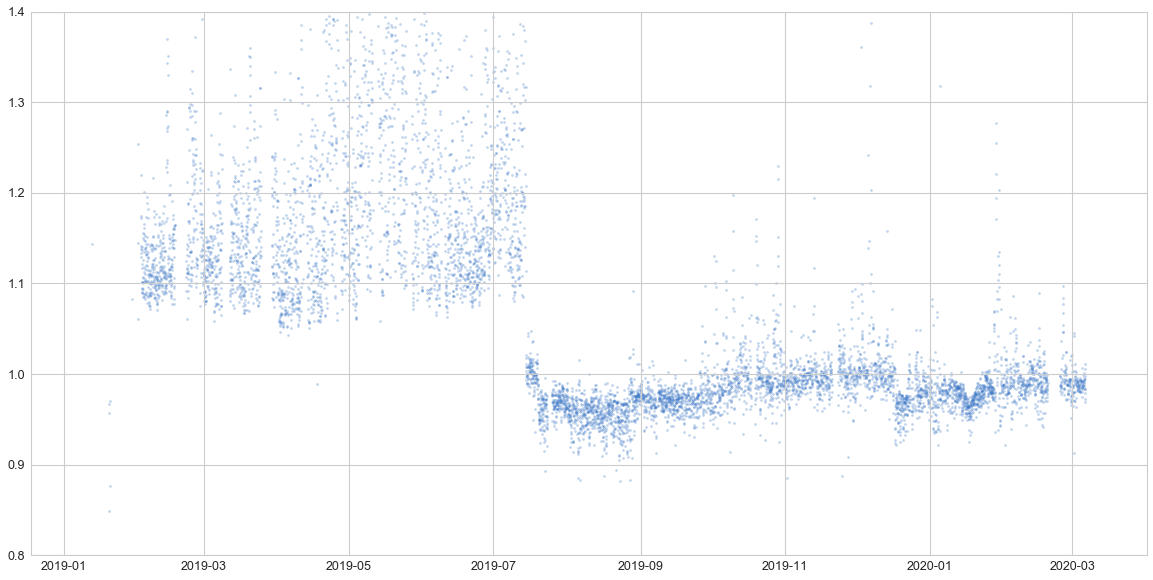

In [11]:
plt.figure(figsize=[20,10])
plt.scatter(sensor_hourly['Sensor1'].index,sensor_hourly["Sensor1"]/sensor_hourly["Sensor2"],6,alpha=0.3)
plt.ylim([0.8,1.4])